In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Loading the SO2 dataset from the file directory

df = pd.read_csv('/home/sauharda/Desktop/webExtract/SO2/Extracted files/daily_42401_2022.csv', low_memory = False)

In [5]:
print(df.head())

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ...  AQI Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  0.0         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...  1.0         100   

                               Method Name   Local Site Name  \
0  INSTRUMENTAL - ULTRAVIOLET FLUORESCEN

In [6]:
# Creating a new column countyfips; i.e. State Code * 1000 + (County Code)
df['countyfips'] = df['State Code']*1000 + df['County Code']


In [7]:
print(df['countyfips'].head())

0    1073
1    1073
2    1073
3    1073
4    1073
Name: countyfips, dtype: int64


In [8]:
#Filtering the rows where the sample duration is one hour 
df_1hr = df[df['Sample Duration'] == '1 HOUR']


In [9]:
print(df_1hr.head())

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name Sample Duration  ... Method Code  \
0    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...         100   
1    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...         100   
2    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...         100   
3    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...         100   
4    -86.815  WGS84  Sulfur dioxide          1 HOUR  ...         100   

                               Method Name   Local Site Name  \
0  INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE  North Birmingham   
1  INS

In [10]:
summary = df_1hr.groupby('countyfips').agg(
    so2_mean = pd.NamedAgg(column='Arithmetic Mean', aggfunc='mean'),
    so2_max = pd.NamedAgg(column = '1st Max Value', aggfunc='mean'),
).reset_index()

In [11]:
print(summary.head())

   countyfips  so2_mean   so2_max
0        1073  0.270140  1.220000
1        1097  0.955171  2.049441
2        1117  1.169159  5.278512
3        1119  0.413545  0.819391
4        2090  2.569239  5.084266


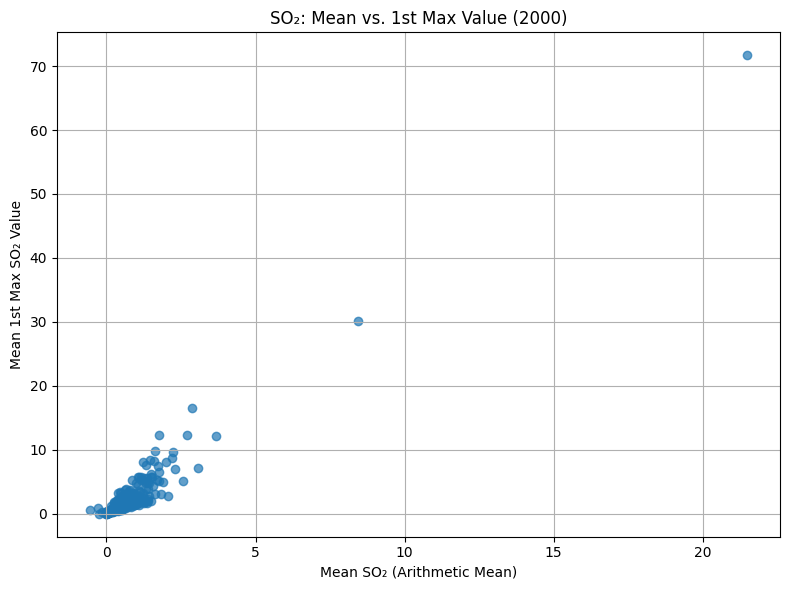

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(summary['so2_mean'], summary['so2_max'], alpha=0.7)
plt.title("SO₂: Mean vs. 1st Max Value (2000)")
plt.xlabel("Mean SO₂ (Arithmetic Mean)")
plt.ylabel("Mean 1st Max SO₂ Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# loading the NO2 dataset from the file directory

df = pd.read_csv('/home/sauharda/Desktop/webExtract/NO2/Extracted files/daily_42602_2024.csv', low_memory=False)

In [14]:
print(df)

       State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0               4           13        19           42602    1  33.483780   
1               4           13        19           42602    1  33.483780   
2               4           13        19           42602    1  33.483780   
3               4           13        19           42602    1  33.483780   
4               4           13        19           42602    1  33.483780   
...           ...          ...       ...             ...  ...        ...   
86915          56           39      1013           42602    1  44.373056   
86916          56           39      1013           42602    1  44.373056   
86917          56           39      1013           42602    1  44.373056   
86918          56           39      1013           42602    1  44.373056   
86919          56           39      1013           42602    1  44.373056   

        Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0     -112